#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [3]:
from google.colab import files
upload = files.upload() #Uploading Files

Saving imdb_top_10000.txt to imdb_top_10000.txt


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('imdb_top_10000.txt', sep = "\t",  names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'] ) #Importing Files to read dataset
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [21]:
df.isnull().sum() #to check the number of null values

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [7]:
df.dropna(inplace=True)
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[9999 rows x 7 columns]

In [22]:
df.shape

(10000, 7)

In [32]:
df.dropna(subset = ['genres'], inplace=True)
df.shape

(9999, 7)

In [8]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

In [ ]:
Determine the best movie based on score of each movie.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [33]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [34]:
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [35]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [36]:
genre = df.genres[0]
genre

'Crime|Drama'

In [37]:
genre_set=set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

24

In [38]:
#to add columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Action  Sport  Crime  ...  Sci-Fi  \
0                       Crime|Drama   False  False   True  ...   False   
1                    Crime|Thriller   False  False   True  ...   False   
2            Drama|Mystery|Thriller   False  False  False  ...   False   
3           Action|Adventure|Sci-Fi    True  False  False  ...    True   
4  Action|Adventure|Sci-Fi|Thriller    True  False  False  ...    True   

   Musical  Animation  Thriller   News  Film-Noir  Drama  Music  Family  \
0    False      False     False  False      False   True  False   False   
1    False      False      True  False      False  False  False   False   
2    False      False      True  False      False   True  False   False   
3    False      False     False  False      False  False  False   False   
4    False      False      True  False      False  False  False   False   

   Biography  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 31 columns]

In [39]:
df.drop(["genres"],axis=1, inplace=True)

In [40]:
#To split name and year in the column title
df['title'] = [titles[0:-7] for titles in df.title]
df.head()


imdbID              title  year  score   votes  runtime  Action  Sport  \
0  tt0111161  The Shawshank Red  1994    9.2  619479      142   False  False   
1  tt0110912              Pulp   1994    9.0  490065      154   False  False   
2  tt0137523                Fig  1999    8.8  458173      139   False  False   
3  tt0133093                The  1999    8.7  448114      136    True  False   
4  tt1375666                 In  2010    8.9  385149      148    True  False   

   Crime    War  ...  Sci-Fi  Musical  Animation  Thriller   News  Film-Noir  \
0   True  False  ...   False    False      False     False  False      False   
1   True  False  ...   False    False      False      True  False      False   
2  False  False  ...   False    False      False      True  False      False   
3  False  False  ...    True    False      False     False  False      False   
4  False  False  ...    True    False      False      True  False      False   

   Drama  Music  Family  Biography  
0   True  False   False      False  
1  False  False   False      False  
2   True  False   False      False  
3  False  False   False      False  
4  False  False   False      False  

[5 rows x 30 columns]

## 4. EDA

In [41]:
df.describe() #Graphs


year        score          votes      runtime
count  9999.000000  9999.000000    9999.000000  9999.000000
mean   1993.471447     6.385989   16605.462946   103.580358
std      14.830049     1.189965   34564.883945    26.629310
min    1950.000000     1.500000    1356.000000     0.000000
25%    1986.000000     5.700000    2334.500000    93.000000
50%    1998.000000     6.600000    4981.000000   102.000000
75%    2005.000000     7.200000   15278.500000   115.000000
max    2011.000000     9.200000  619479.000000   450.000000

Text(0, 0.5, 'Number of movies')

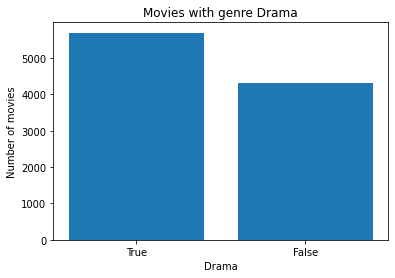

In [42]:
x=['True', 'False']
y=df.Drama.value_counts()
plt.bar(x,y)
plt.title("Movies with genre Drama")
plt.xlabel("Drama")
plt.ylabel("Number of movies")

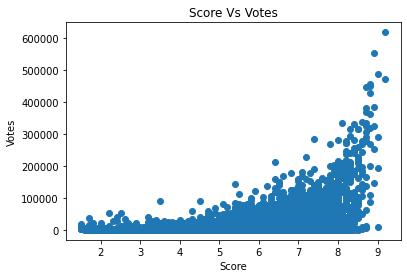

In [30]:
plt.scatter(df.score,df.votes)
plt.title("Score Vs Votes")
plt.xlabel("Score")
plt.ylabel("Votes")
plt.show()

## 5. Determining Best Movies

In [43]:
#Group Properties 
yeardf = df.groupby('year', sort=False)
yeardf



In [44]:
yeardf.size()

year
1994    235
1999    297
2010    315
2009    417
1993    219
       ... 
1961     43
1951     32
1953     47
1956     46
1955     53
Length: 62, dtype: int64

In [45]:
yeardf.first()

imdbID              title  score   votes  runtime  Action  Sport  \
year                                                                        
1994  tt0111161  The Shawshank Red    9.2  619479      142   False  False   
1999  tt0137523                Fig    8.8  458173      139   False  False   
2010  tt1375666                 In    8.9  385149      148    True  False   
2009  tt0499549                       8.1  336855      162    True  False   
1993  tt0108052          Schindler    8.9  325888      195   False  False   
...         ...                ...    ...     ...      ...     ...    ...   
1961  tt0054698    Breakfast at Ti    7.8   42114      115   False  False   
1951  tt0044079      Strangers on     8.3   40104      101   False  False   
1953  tt0046250             Roman     8.1   36760      118   False  False   
1956  tt0049730             The Se    8.1   32502      119   False  False   
1955  tt0048545     Rebel Without     7.9   30491      111   False  False   

      Crime    War  Horror  ...  Sci-Fi  Musical  Animation  Thriller   News  \
year                        ...                                                
1994   True  False   False  ...   False    False      False     False  False   
1999  False  False   False  ...   False    False      False      True  False   
2010  False  False   False  ...    True    False      False      True  False   
2009  False  False   False  ...    True    False      False     False  False   
1993  False   True   False  ...   False    False      False     False  False   
...     ...    ...     ...  ...     ...      ...        ...       ...    ...   
1961  False  False   False  ...   False    False      False     False  False   
1951   True  False   False  ...   False    False      False      True  False   
1953  False  False   False  ...   False    False      False     False  False   
1956  False  False   False  ...   False    False      False     False  False   
1955  False  False   False  ...   False    False      False     False  False   

      Film-Noir  Drama  Music  Family  Biography  
year                                              
1994      False   True  False   False      False  
1999      False   True  False   False      False  
2010      False  False  False   False      False  
2009      False  False  False   False      False  
1993      False   True  False   False       True  
...         ...    ...    ...     ...        ...  
1961      False   True  False   False      False  
1951       True  False  False   False      False  
1953      False   True  False   False      False  
1956      False   True  False   False      False  
1955      False   True  False   False      False  

[62 rows x 29 columns]

In [46]:
yeardf.groups

{1994: [0, 1, 5, 21, 74, 248, 267, 310, 326, 345, 348, 388, 400, 477, 564, 730, 845, 910, 1016, 1159, 1296, 1373, 1414, 1456, 1467, 1476, 1480, 1610, 1718, 1724, 1758, 1847, 1876, 1881, 1981, 1986, 1999, 2038, 2071, 2072, 2106, 2117, 2190, 2196, 2225, 2284, 2297, 2355, 2404, 2425, 2446, 2461, 2500, 2531, 2586, 2702, 2744, 2762, 2962, 2966, 2994, 3030, 3110, 3136, 3212, 3226, 3252, 3253, 3311, 3385, 3406, 3440, 3473, 3481, 3487, 3538, 3558, 3592, 3598, 3615, 3684, 3708, 3711, 3762, 3778, 3815, 3817, 3909, 3926, 3970, 3999, 4013, 4042, 4043, 4047, 4051, 4104, 4112, 4199, 4227, ...], 1999: [2, 3, 6, 15, 22, 77, 150, 154, 190, 193, 197, 216, 219, 250, 264, 289, 320, 349, 378, 448, 449, 451, 462, 479, 525, 551, 601, 648, 650, 657, 658, 703, 710, 712, 725, 735, 761, 775, 793, 831, 885, 889, 966, 969, 973, 1010, 1011, 1013, 1047, 1055, 1060, 1063, 1153, 1187, 1202, 1207, 1217, 1252, 1255, 1263, 1272, 1281, 1293, 1336, 1343, 1365, 1432, 1455, 1519, 1564, 1582, 1643, 1647, 1651, 1832, 1844, 186

In [47]:
yeardf.get_group(2010).head()

imdbID    title  year  score   votes  runtime  Action  Sport  Crime  \
4    tt1375666       In  2010    8.9  385149      148    True  False  False   
100  tt1130884  Shutter  2010    8.0  171493      138   False  False  False   
117  tt0947798      Bla  2010    8.3  150346      108   False  False  False   
122  tt0435761     Toy   2010    8.6  144200      103   False  False  False   
145  tt1250777        K  2010    8.0  146535      117    True  False  False   

       War  ...  Sci-Fi  Musical  Animation  Thriller   News  Film-Noir  \
4    False  ...    True    False      False      True  False      False   
100  False  ...   False    False      False      True  False      False   
117  False  ...   False    False      False      True  False      False   
122  False  ...   False    False       True     False  False      False   
145  False  ...   False    False      False     False  False      False   

     Drama  Music  Family  Biography  
4    False  False   False      False  
100   True  False   False      False  
117   True  False   False      False  
122  False  False    True      False  
145  False  False   False      False  

[5 rows x 30 columns]

In [48]:
yeardf.max()

imdbID                             title  score   votes  runtime  \
year                                                                        
1994  tt0145529  Yrrol - En kolossalt genomt\xe4n    9.2  619479      450   
1999  tt0289424                                 e    8.8  458173      189   
2010  tt1740707       You Will Meet a Tall Dark S    8.9  385149      179   
2009  tt1569364                               Zom    8.4  336855      170   
1993  tt0115819               Wrestling Ernest He    8.9  325888      261   
...         ...                               ...    ...     ...      ...   
1961  tt0055913                          West Sid    8.4   42114      186   
1951  tt0044876                      When Worlds     8.3   40104      171   
1953  tt0047677                              Toky    8.3   36760      136   
1956  tt0197521                      Written on t    8.2   32502      220   
1955  tt0049674                          We're No    8.3   30491      181   

      Action  Sport  Crime   War  Horror  ...  Sci-Fi  Musical  Animation  \
year                                      ...                               
1994    True   True   True  True    True  ...    True     True       True   
1999    True   True   True  True    True  ...    True     True       True   
2010    True   True   True  True    True  ...    True     True       True   
2009    True   True   True  True    True  ...    True     True       True   
1993    True   True   True  True    True  ...    True     True       True   
...      ...    ...    ...   ...     ...  ...     ...      ...        ...   
1961    True   True   True  True    True  ...    True     True       True   
1951    True   True   True  True    True  ...    True     True       True   
1953    True  False   True  True    True  ...    True     True       True   
1956    True   True   True  True    True  ...    True     True      False   
1955    True  False   True  True    True  ...    True     True       True   

      Thriller   News  Film-Noir  Drama  Music  Family  Biography  
year                                                               
1994      True  False      False   True   True    True       True  
1999      True  False      False   True   True    True       True  
2010      True   True      False   True   True    True       True  
2009      True  False      False   True   True    True       True  
1993      True  False      False   True   True    True       True  
...        ...    ...        ...    ...    ...     ...        ...  
1961      True  False      False   True  False    True       True  
1951      True  False       True   True  False    True       True  
1953      True  False       True   True   True    True       True  
1956      True  False       True   True   True    True       True  
1955      True  False       True   True   True    True       True  

[62 rows x 29 columns]

In [49]:
yeardf.min()

imdbID       title  score  votes  runtime  Action  Sport  Crime  \
year                                                                       
1994  tt0106339                2.0   1357        0   False  False  False   
1999  tt0118665                2.2   1356        0   False  False  False   
2010  tt0398286                2.2   1357        0   False  False  False   
2009  tt0327597                1.5   1363        0   False  False  False   
1993  tt0103743                2.4   1374        0   False  False  False   
...         ...         ...    ...    ...      ...     ...    ...    ...   
1961  tt0054130                1.7   1379        0   False  False  False   
1951  tt0042619  A Christma    6.2   1474       69   False  False  False   
1953  tt0044953                2.9   1376        0   False  False  False   
1956  tt0047892                3.1   1363        0   False  False  False   
1955  tt0046889                3.7   1360        0   False  False  False   

        War  Horror  ...  Sci-Fi  Musical  Animation  Thriller   News  \
year                 ...                                                
1994  False   False  ...   False    False      False     False  False   
1999  False   False  ...   False    False      False     False  False   
2010  False   False  ...   False    False      False     False  False   
2009  False   False  ...   False    False      False     False  False   
1993  False   False  ...   False    False      False     False  False   
...     ...     ...  ...     ...      ...        ...       ...    ...   
1961  False   False  ...   False    False      False     False  False   
1951  False   False  ...   False    False      False     False  False   
1953  False   False  ...   False    False      False     False  False   
1956  False   False  ...   False    False      False     False  False   
1955  False   False  ...   False    False      False     False  False   

      Film-Noir  Drama  Music  Family  Biography  
year                                              
1994      False  False  False   False      False  
1999      False  False  False   False      False  
2010      False  False  False   False      False  
2009      False  False  False   False      False  
1993      False  False  False   False      False  
...         ...    ...    ...     ...        ...  
1961      False  False  False   False      False  
1951      False  False  False   False      False  
1953      False  False  False   False      False  
1956      False  False  False   False      False  
1955      False  False  False   False      False  

[62 rows x 29 columns]

In [50]:
yeardf.mean()

score         votes     runtime    Action     Sport     Crime  \
year                                                                     
1994  6.081277  19507.868085  106.689362  0.212766  0.051064  0.174468   
1999  6.306734  24169.387205  106.501684  0.154882  0.023569  0.178451   
2010  6.340635  19286.180952  103.034921  0.247619  0.015873  0.149206   
2009  6.287290  18519.033573  100.158273  0.201439  0.021583  0.196643   
1993  6.173516  14785.292237  107.292237  0.232877  0.031963  0.210046   
...        ...           ...         ...       ...       ...       ...   
1961  7.195349   7551.651163  106.418605  0.093023  0.046512  0.116279   
1951  7.478125   8543.812500  102.750000  0.093750  0.031250  0.156250   
1953  7.106383   6196.127660   94.212766  0.085106  0.000000  0.106383   
1956  7.139130   5904.108696  111.913043  0.108696  0.043478  0.086957   
1955  7.250943   6196.584906  103.264151  0.056604  0.000000  0.188679   

           War    Horror   Mystery     Adult  ...    Sci-Fi   Musical  \
year                                          ...                       
1994  0.021277  0.063830  0.089362  0.000000  ...  0.059574  0.012766   
1999  0.050505  0.084175  0.114478  0.003367  ...  0.070707  0.013468   
2010  0.028571  0.114286  0.095238  0.003175  ...  0.060317  0.006349   
2009  0.031175  0.148681  0.122302  0.000000  ...  0.115108  0.011990   
1993  0.031963  0.086758  0.091324  0.000000  ...  0.068493  0.009132   
...        ...       ...       ...       ...  ...       ...       ...   
1961  0.046512  0.093023  0.046512  0.000000  ...  0.139535  0.069767   
1951  0.156250  0.062500  0.062500  0.000000  ...  0.156250  0.125000   
1953  0.085106  0.127660  0.085106  0.000000  ...  0.148936  0.106383   
1956  0.195652  0.086957  0.065217  0.000000  ...  0.086957  0.086957   
1955  0.113208  0.113208  0.113208  0.000000  ...  0.113208  0.056604   

      Animation  Thriller      News  Film-Noir     Drama     Music    Family  \
year                                                                           
1994   0.038298  0.229787  0.000000   0.000000  0.514894  0.034043  0.148936   
1999   0.030303  0.282828  0.000000   0.000000  0.616162  0.037037  0.057239   
2010   0.038095  0.339683  0.003175   0.000000  0.555556  0.015873  0.076190   
2009   0.045564  0.376499  0.000000   0.000000  0.565947  0.035971  0.067146   
1993   0.018265  0.283105  0.000000   0.000000  0.602740  0.059361  0.123288   
...         ...       ...       ...        ...       ...       ...       ...   
1961   0.023256  0.093023  0.000000   0.000000  0.627907  0.000000  0.093023   
1951   0.031250  0.093750  0.000000   0.156250  0.687500  0.000000  0.031250   
1953   0.021277  0.212766  0.000000   0.127660  0.617021  0.042553  0.042553   
1956   0.000000  0.130435  0.000000   0.130435  0.739130  0.021739  0.043478   
1955   0.018868  0.226415  0.000000   0.113208  0.641509  0.037736  0.037736   

      Biography  
year             
1994   0.055319  
1999   0.033670  
2010   0.041270  
2009   0.047962  
1993   0.050228  
...         ...  
1961   0.069767  
1951   0.031250  
1953   0.021277  
1956   0.108696  
1955   0.094340  

[62 rows x 27 columns]

In [51]:
#applying methods to particular rows
yeardf['score'].mean()

year
1994    6.081277
1999    6.306734
2010    6.340635
2009    6.287290
1993    6.173516
          ...   
1961    7.195349
1951    7.478125
1953    7.106383
1956    7.139130
1955    7.250943
Name: score, Length: 62, dtype: float64

In [52]:
for key, valdf in yeardf:
    result = valdf[valdf['score'] == valdf.score.max()]
    print(result.title, result.year, result.score)

0    The Shawshank Red
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64
2    Fig
Name: title, dtype: object 2    1999
Name: year, dtype: int64 2    8.8
Name: score, dtype: float64
4    In
Name: title, dtype: object 4    2010
Name: year, dtype: int64 4    8.9
Name: score, dtype: float64
23    Inglourious B
Name: title, dtype: object 23    2009
Name: year, dtype: int64 23    8.4
Name: score, dtype: float64
8    Schindler
Name: title, dtype: object 8    1993
Name: year, dtype: int64 8    8.9
Name: score, dtype: float64
9    Star Wars: Episode V - The Empire Strik
Name: title, dtype: object 9    1980
Name: year, dtype: int64 9    8.8
Name: score, dtype: float64
2678    My Father and
Name: title, dtype: object 2678    2005
Name: year, dtype: int64 2678    8.7
Name: score, dtype: float64
11    The Usual S
31               
Name: title, dtype: object 11    1995
31    1995
Name: year, dtype: int64 11    8.7
31    8.7
Name: score, dtype: float64

In [53]:
df[df.score == df.score.max()][['title', 'year', 'score']]

title  year  score
0   The Shawshank Red  1994    9.2
26             The Go  1972    9.2

## 6. Trends in Popularity of Genres

In [54]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [55]:
genredf.sum()

Action        1891
Sport          288
Crime         1867
War            512
Horror        1215
Mystery       1009
Adult            9
History        358
Comedy        3922
Western        235
Adventure     1313
Romance       2441
Fantasy        916
Reality-TV       1
Sci-Fi         897
Musical        260
Animation      314
Thriller      2832
News             1
Film-Noir       40
Drama         5697
Music          371
Family         754
Biography      394
dtype: int64

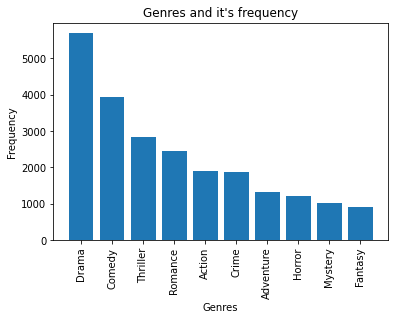

In [56]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:10]
y = result[:10]
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()